## **Lab 2 - Clustering Exercise**

In this exercise, we will apply our knowledge of clustering on the following dataset:

Dataset Link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Clustering on this dataset will be done using KMeans, Hierarchal clustering and DBSCAN. Finding the optimal hypermaters for each and then choosing the best model among the three

Start by Importing needed libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset into a DataFrame

In [5]:
from google.colab import files

uploaded = files.upload()


Saving CC GENERAL.csv to CC GENERAL.csv


In [6]:
print(uploaded.keys())


dict_keys(['CC GENERAL.csv'])


In [7]:
df = pd.read_csv("CC GENERAL.csv")

In [8]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
df = df.fillna(0)

In [10]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
df = pd.get_dummies(df)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

## K-Means

Find the optimal Kmeans model

Text(0, 0.5, ' Sum of Squared Distances')

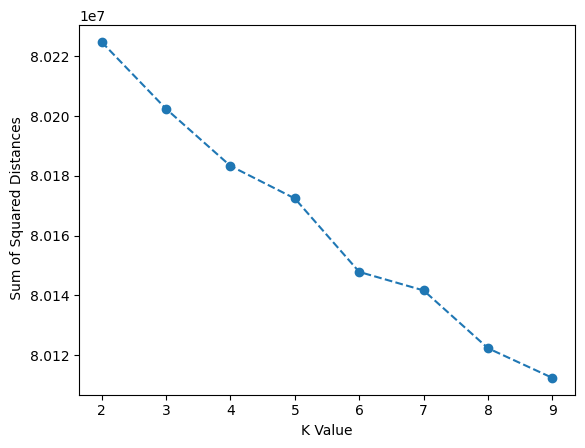

In [13]:
from sklearn.cluster import KMeans

ssd = []

for k in range(2,10):

    model = KMeans(n_clusters=k)


    model.fit(scaled_df)

    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [ ]:
#The elbow method does not give conclusive answer. this is because a definite elbow cannot be observed. Thus, to choose the best k we
#need another metric. This metric is the silhouette score. In the next cell we will try different Ks and calculate the silhouette
#score for each K chosen. Next , we will plot the silhouette score vs the number of clusters to see if we can find the elbow in
#in the silhouette score. This is because the sum of squared distances shows no clear elbow.

Silhouette Score for k=2: 0.0006
Silhouette Score for k=3: 0.0004
Silhouette Score for k=4: 0.0001
Silhouette Score for k=5: -0.0000
Silhouette Score for k=6: 0.0000
Silhouette Score for k=7: -0.0000
Silhouette Score for k=8: 0.0000
Silhouette Score for k=9: 0.0000


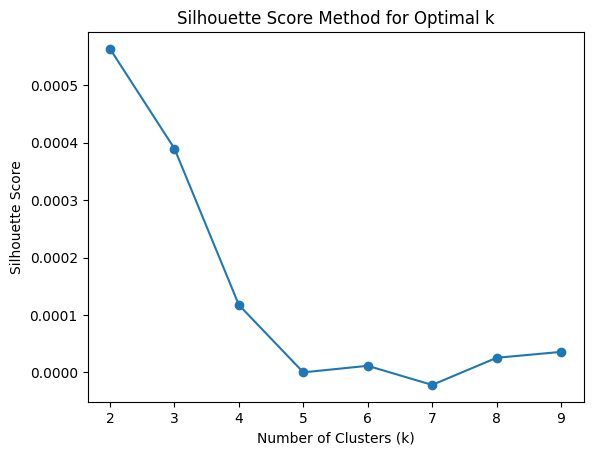

In [14]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 10)  # Trying different k values

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)  # Fix random state for reproducibility
    labels = model.fit_predict(scaled_df)  # Get cluster labels
    score = silhouette_score(scaled_df, labels)  # Compute silhouette score
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.4f}")  # Print score for each k

# Plot silhouette scores

plt.plot(k_values, silhouette_scores, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Method for Optimal k")
plt.show()


Choose the optimal K and calculate the silhouette score for the best model.

In [ ]:
#As we can see from the output of the previous cell, the highest silhouette score is for K = 2. Thus, we consider the optimal K to be 2.
#The silhouette score for this K is 0.0006.

## Agglomerative Clustering

Find the optimal agglomerative clustering model.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

model = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage = "average")
cluster_labels = model.fit_predict(scaled_df)
x = silhouette_score(scaled_df, cluster_labels)
print(x)

0.03027293328292119


In [ ]:
model = AgglomerativeClustering(n_clusters=2, metric="manhattan", linkage = "complete")
cluster_labels = model.fit_predict(scaled_df)
x = silhouette_score(scaled_df, cluster_labels)
print(x)

0.014443846917288257


In [ ]:
#In the previous two cells, we will run agglomerative clustering for two cases of changing the linkage. We will compare between them
#with the silhouette score. The better silhouette score is more optimum one. Note, we will keep the number of clusters as 2 and change
#the affinity (here known as metric) and the linkage to see which is more optimum. This will be chosen according to the silhouette score.

Choose the optimal K and calculate the silhouette score for the best model.

In [ ]:
#The case where we chose metric = euclidian and linkage = average has the highest silhouette score and thus is the most optimum
#for the case of k=2.

## DBSCAN

Find the optimal DBSCAN model.

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Define a range for eps and min_samples
eps_range = np.linspace(100, 200, 10)  # Increase upper bound for better clustering
num_features = 36  # Given feature size
min_samples_range = [5, 7 , 9 , 2, 36]  # Adjusted min_samples to be around half of feature size

best_score = -1
best_eps = None
best_min_samples = None

# Loop through different values of eps and min_samples
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
        labels = dbscan.fit_predict(scaled_df)

        noise_ratio = (labels == -1).sum() / len(labels)  # Calculate noise percentage
        num_clusters = len(set(labels) - {-1})  # Exclude noise label (-1)

        print(f"eps: {eps:.2f}, min_samples: {min_samples}, Clusters: {num_clusters}, Noise: {noise_ratio:.2%}")

        # Only evaluate models with more than 1 cluster
        if num_clusters > 1:
            score = silhouette_score(scaled_df, labels)
            print(f"Silhouette Score: {score:.4f}")
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f'Best eps: {best_eps} with best min_samples: {best_min_samples} and silhouette score: {best_score}')



eps: 100.00, min_samples: 5, Clusters: 0, Noise: 100.00%
eps: 100.00, min_samples: 7, Clusters: 0, Noise: 100.00%
eps: 100.00, min_samples: 9, Clusters: 0, Noise: 100.00%
eps: 100.00, min_samples: 2, Clusters: 0, Noise: 100.00%
eps: 100.00, min_samples: 36, Clusters: 0, Noise: 100.00%
eps: 111.11, min_samples: 5, Clusters: 0, Noise: 100.00%
eps: 111.11, min_samples: 7, Clusters: 0, Noise: 100.00%
eps: 111.11, min_samples: 9, Clusters: 0, Noise: 100.00%
eps: 111.11, min_samples: 2, Clusters: 0, Noise: 100.00%
eps: 111.11, min_samples: 36, Clusters: 0, Noise: 100.00%
eps: 122.22, min_samples: 5, Clusters: 0, Noise: 100.00%
eps: 122.22, min_samples: 7, Clusters: 0, Noise: 100.00%
eps: 122.22, min_samples: 9, Clusters: 0, Noise: 100.00%
eps: 122.22, min_samples: 2, Clusters: 0, Noise: 100.00%
eps: 122.22, min_samples: 36, Clusters: 0, Noise: 100.00%
eps: 133.33, min_samples: 5, Clusters: 0, Noise: 100.00%
eps: 133.33, min_samples: 7, Clusters: 0, Noise: 100.00%
eps: 133.33, min_samples: 9,

Find the parameters that optimize the performance of your model and calculate the silhouette score.

In [ ]:
# as can be seen, the data seems to be very sparse. any epsilon before 144 gave 0 clusters, and all data sets were calssified as outliers.
# Once epsillon exceeded 140, all data were grouped in one cluster, which is not a solution either

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Define a range for eps and min_samples
eps_range = np.linspace(133, 150, 10)  # Increase upper bound for better clustering
num_features = 36  # Given feature size
min_samples_range = [7 , 9]  # Adjusted min_samples to be around half of feature size

best_score = -1
best_eps = None
best_min_samples = None

# Loop through different values of eps and min_samples
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
        labels = dbscan.fit_predict(scaled_df)

        noise_ratio = (labels == -1).sum() / len(labels)  # Calculate noise percentage
        num_clusters = len(set(labels) - {-1})  # Exclude noise label (-1)

        print(f"eps: {eps:.2f}, min_samples: {min_samples}, Clusters: {num_clusters}, Noise: {noise_ratio:.2%}")

        # Only evaluate models with more than 1 cluster
        if num_clusters > 1:
            score = silhouette_score(scaled_df, labels)
            print(f"Silhouette Score: {score:.4f}")
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f'Best eps: {best_eps} with best min_samples: {best_min_samples} and silhouette score: {best_score}')



eps: 133.00, min_samples: 7, Clusters: 0, Noise: 100.00%
eps: 133.00, min_samples: 9, Clusters: 0, Noise: 100.00%
eps: 134.89, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 134.89, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 136.78, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 136.78, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 138.67, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 138.67, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 140.56, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 140.56, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 142.44, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 142.44, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 144.33, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 144.33, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 146.22, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 146.22, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 148.11, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 148.11, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 1

In [ ]:
# Testing the fineline between 100% noise and 0% noise further, in hopes of finding an intermediate epsilon that works
# but still, behaviour didn't change. The data appears to be sparse, making it hard for DBSCAN to detect meaningful density-based clusters.
# this suggests that DBSCAN may not be the right clustering method for this dataset.

## Result Interpretation and Discussion

Which model was chosen? Why was it chosen and based on what?

In [ ]:
# K-Means was selected as the best model as it provided the most distinct cluster separation based on the silhouette score.
# DBSCAN was ineffective due to the dataset’s sparsity, leading to either all points being classified as noise or forming a single large cluster.
# The dataset appears more suitable for partition-based clustering (K-Means, Agglomerative) rather than density-based clustering (DBSCAN).
# The fact that only two clusters were optimal suggests that customers exhibit two primary spending behavior patterns.
# DBSCAN’s failure indicates a lack of significant density variations in the dataset that could be leveraged for clustering.